<center><img src='https://i.imgur.com/rZSAcNl.jpg'>
<p>
<p>
<h1><center>Bee or Wasp CNN Binary Classifier</center><h1>
<h3><center>Using convolutional techniques to identify bees vs wasps</center><h3>

## Introduction
Bees and wasps are very similar in appearance, yet we are able to visually distinguish the two. For a computer using traditional ML, this task is difficult, but with the use of a convolutional neural network, computer vision became a reality. I can demonstrate this as the CNN binary classifier can correctly identify bees and wasps as accurately as a human can!

[What are bees and wasps?](https://www.youtube.com/watch?v=KDGJmzqvKTg)


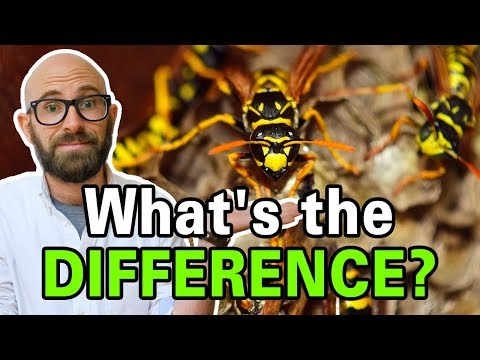

In [5]:
#@title

from IPython.display import YouTubeVideo

YouTubeVideo('KDGJmzqvKTg')

## Uploading zip files and extracting them


In [6]:
from IPython.display import clear_output
# Uploading the training dataset zip file from my google drive
!wget --load-cookies /tmp/cookies.txt \
  "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \
  'https://docs.google.com/uc?export=download&id=1z9zOJl2fAlPY0ptNKkIpmn6Tmaqh2GLd' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1z9zOJl2fAlPY0ptNKkIpmn6Tmaqh2GLd" \
  -O Bees_vs_Wasps.zip && rm -rf /tmp/cookies.txt
# Uploading the validation dataset zip file from my google drive
!wget --load-cookies /tmp/cookies.txt \
  "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate \
  'https://docs.google.com/uc?export=download&id=1w7CfJ-3TCpz6Pmd8gVpXgZpp7XTaK4Gn' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1w7CfJ-3TCpz6Pmd8gVpXgZpp7XTaK4Gn" \
  -O Val_Bees_vs_Wasp.zip && rm -rf /tmp/cookies.txt

clear_output()

In [7]:
import os
import zipfile

# Unzipping files, and extracting to named path
local_zip = '/content/Bees_vs_Wasps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/Bees_vs_Wasps')
local_zip = '/content/Val_Bees_vs_Wasp.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content/Val_Bees_vs_Wasp')
zip_ref.close()

## Setting up directories for image generator

In [8]:
# Instantiating subdirectories for when using image generator to automatically label images
train_bee_dir = os.path.join('/content/Bees_vs_Wasps/Bees vs Wasps/bee1')

train_wasp_dir = os.path.join('/content/Bees_vs_Wasps/Bees vs Wasps/wasp1')

validation_bee_dir = os.path.join('/content/Val_Bees_vs_Wasp/Val Bees vs Wasp/bee2')

validation_wasp_dir = os.path.join('/content/Val_Bees_vs_Wasp/Val Bees vs Wasp/wasp2')

In [9]:
# Checking to see if correct subdirectories 
train_bee_names = os.listdir(train_bee_dir)
print(train_bee_names[:10])
train_wasp_names = os.listdir(train_wasp_dir)
print(train_wasp_names[:10])

validation_bee_names = os.listdir(validation_bee_dir)
print(validation_bee_names[:10])
validation_wasp_names = os.listdir(validation_wasp_dir)
print(validation_wasp_names[:10])

['5994235342_b42c4b3b55_n.jpg', '13974074073_0c6039814a_n.jpg', '4751998841_18476fecc1_m.jpg', '23915937825_e102178b03_w.jpg', '367533682_541f2a6625_w.jpg', '43725584785_7d4b8716f0_w.jpg', '34980605612_66e6b12b4a_m.jpg', '29185054986_9eccdc871d_m.jpg', '35991084584_9b4a9ca031_w.jpg', '29465453641_a2c2014c8c_n.jpg']
['9508633602_98e56d306e_n.jpg', '28209022326_995acce8a0_m.jpg', '34015851324_460a949dcc_n.jpg', '4941985532_f04c95093e_n.jpg', '14506580520_de3344bfe7_n.jpg', '177470982_8b17bde082_n.jpg', '44041132905_42b57571d4_n.jpg', '5980859435_8af35bae00_n.jpg', '9771589215_709ddfa516_n.jpg', '44689561761_de1aff5706_n.jpg']
['NP28671-238r.jpg', 'P59293-160r.jpg', 'P23751-119r.jpg', 'P5762-70r.jpg', 'NP18835-22r.jpg', 'P61628-188r.jpg', 'P16051-250r.jpg', 'NP13068-42r.jpg', 'P11762-35r.jpg', 'NP3641-20r.jpg']
['J00261.jpg', 'F00340.jpg', 'J00299.jpg', 'J00214.jpg', 'J00251.jpg', 'J00158.jpg', 'F00338.jpg', 'G00158.jpg', 'H00266.jpg', 'G00233.jpg']


## Defining and compiling model

In [10]:
import tensorflow as tf

# Defining the model with three convolutions and condensing with MaxPooling2D outputting to a deep neural network with a binary result of either class bee or wasp
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200,200,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Images are compressed to 23x23 pixels with 64 filters, flattened to feed into a DNN 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 198, 198, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 99, 99, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 97, 97, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 46, 46, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 33856)             0

In [11]:
# Compiled with hyperparameters suited for binary classification
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

## Creating image generators and labeling data to two classes

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
 
 # Normalizing pixel values from 0 - 255 to 0 - 1
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)
 
 # defining train_generator, and validation generator, and resizing images to 200x200 pixels with a large batch size to reduce noise
train_generator = train_datagen.flow_from_directory(
    '/content/Bees_vs_Wasps/Bees vs Wasps',
    target_size=(200,200),
    batch_size=256,
    class_mode='binary')
 
validation_generator = validation_datagen.flow_from_directory(
    '/content/Val_Bees_vs_Wasp/Val Bees vs Wasp',
    target_size=(200,200),
    batch_size=256,
    class_mode='binary')

Found 4596 images belonging to 2 classes.
Found 3530 images belonging to 2 classes.


## Displaying what the training images look like

In [13]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

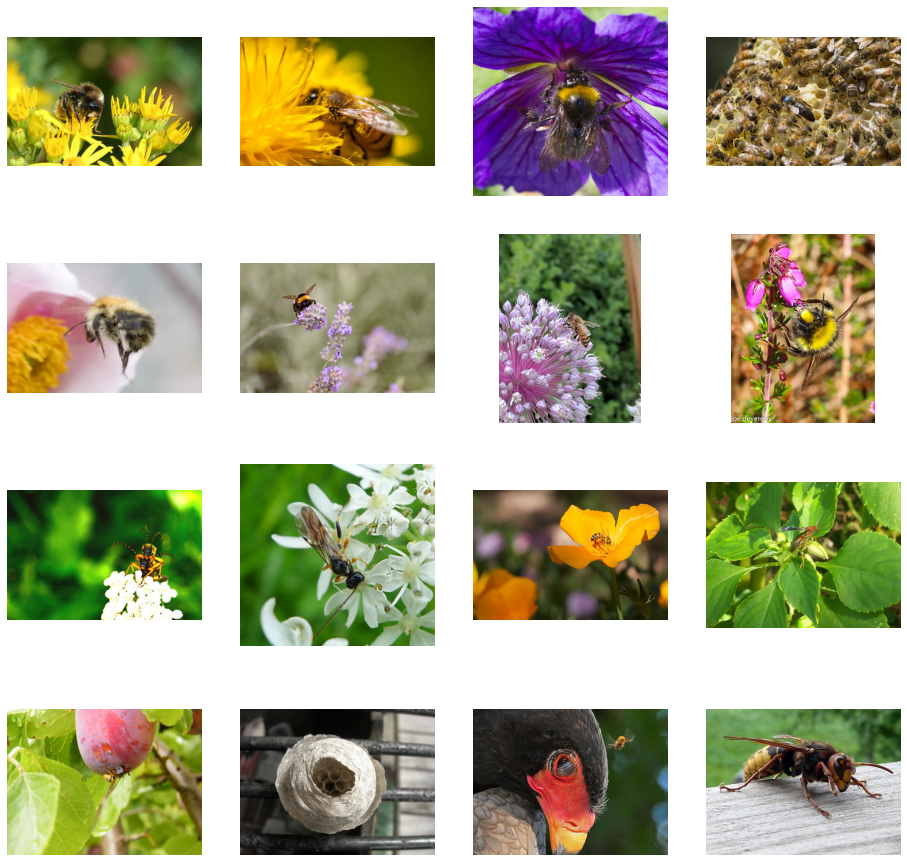

In [14]:
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index +=8
next_bee_pix = [os.path.join(train_bee_dir, fname)
for fname in train_bee_names[pic_index-8:pic_index]]
next_wasp_pix = [os.path.join(train_wasp_dir, fname)
for fname in train_wasp_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_bee_pix+next_wasp_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

## Training the model

In [15]:
desired_accuracy = 0.99
 
# Using callbacks to reach desired accuracy, while trying to reduce overfitting
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>desired_accuracy):
      print("\nReached 99% accuracy so cancelling training!")
      self.model.stop_training = True
 
callbacks = myCallback()
 
history = model.fit(
    train_generator,
    steps_per_epoch=18,
    epochs=30,
    verbose=1,
    callbacks=[callbacks],
    validation_data = validation_generator,
    validation_steps=14
)

Epoch 1/30
18/18 [==============================] - 35s 2s/step - loss: 0.9351 - accuracy: 0.5685 - val_loss: 0.7828 - val_accuracy: 0.1484
Epoch 2/30
18/18 [==============================] - 32s 2s/step - loss: 0.5893 - accuracy: 0.6826 - val_loss: 0.5835 - val_accuracy: 0.7609
Epoch 3/30
18/18 [==============================] - 31s 2s/step - loss: 0.5156 - accuracy: 0.7528 - val_loss: 0.7402 - val_accuracy: 0.6924
Epoch 4/30
18/18 [==============================] - 31s 2s/step - loss: 0.4578 - accuracy: 0.7866 - val_loss: 0.8572 - val_accuracy: 0.3535
Epoch 5/30
18/18 [==============================] - 31s 2s/step - loss: 0.4547 - accuracy: 0.7933 - val_loss: 0.8730 - val_accuracy: 0.4915
Epoch 6/30
18/18 [==============================] - 31s 2s/step - loss: 0.3738 - accuracy: 0.8366 - val_loss: 0.9747 - val_accuracy: 0.4108
Epoch 7/30
18/18 [==============================] - 31s 2s/step - loss: 0.3237 - accuracy: 0.8675 - val_loss: 0.8671 - val_accuracy: 0.5816
Epoch 8/30
18/18 [==

## Getting predictions

>  Model can now distinguish between bees and wasps!






In [17]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(200, 200))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]>0.5:
    print(fn + " is a wasp")
  else:
    print(fn + " is a bee")

Saving barrybeemovie.jpg to barrybeemovie.jpg
[0.]
barrybeemovie.jpg is a bee


## Results

*   Model: Convolutional neural network
*   Steps: batch 256 
*   Size: Input size 200x200x3
*   Optimizer: Adam
*   Loss: Binary crossentropy
*   Accuracy: 99.28%










## Datasets used
https://www.kaggle.com/jerzydziewierz/bee-vs-wasp?select=*kaggle_bee_vs_wasp*